In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, ParameterGrid 
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
import mlflow

In [2]:
def load_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
df = load_data(r'C:\Users\isilh\OneDrive/Masaüstü/github_projeler/Milk_quality_mlflow/milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df["Grade"].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [5]:
df["Grade"].unique()

array(['high', 'low', 'medium'], dtype=object)

In [6]:
df['Grade'] = df['Grade'].map({"low": 1, "medium": 2, "high" : 3})

In [7]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,3
1,6.6,36,0,1,0,1,253,3
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [8]:
y = df['Grade']
X = df.drop(['Grade'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
params = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.5,
    'subsample': 0.8,
    'colsample_bytree': 0.5
}

model = XGBRegressor(**params, use_label_encoder=False)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [11]:
y_pred = model.predict(X_test)

In [12]:
X_test

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
576,6.6,40,1,0,1,1,255
312,4.5,60,0,1,1,1,250
70,9.0,43,1,0,1,1,250
682,6.8,45,0,0,0,1,255
896,6.6,38,0,0,0,0,255
...,...,...,...,...,...,...,...
55,6.7,45,1,1,1,0,245
120,6.6,45,0,0,0,1,250
533,6.8,41,0,0,0,0,255
25,6.5,36,0,1,1,0,253


In [13]:
y_test

576    3
312    1
70     1
682    2
896    2
      ..
55     2
120    2
533    2
25     3
72     3
Name: Grade, Length: 212, dtype: int64

In [14]:
y_pred

array([2.763705  , 1.0001851 , 0.9995155 , 1.9967341 , 1.9943345 ,
       0.9998553 , 1.000052  , 2.999562  , 1.0003234 , 2.0114417 ,
       1.0000112 , 1.9993658 , 2.99936   , 1.9993658 , 0.99994576,
       1.000052  , 3.000929  , 1.9980608 , 1.9943345 , 1.998142  ,
       1.0003234 , 2.0002422 , 2.99936   , 1.9997177 , 1.9997177 ,
       2.0114417 , 1.9302453 , 2.9984593 , 1.0000623 , 0.99988973,
       2.0001764 , 3.001382  , 3.0002475 , 2.0114417 , 2.999562  ,
       1.9924768 , 1.9996173 , 2.999562  , 2.004886  , 1.9993658 ,
       0.99988973, 0.9998553 , 1.0003234 , 2.0114417 , 2.9995565 ,
       1.000189  , 2.9979804 , 2.99936   , 2.000658  , 2.99936   ,
       1.9891893 , 0.99994576, 1.000189  , 1.998142  , 1.9943345 ,
       0.9998553 , 2.99936   , 0.9995155 , 1.0009718 , 2.003233  ,
       2.004886  , 0.9988633 , 2.996262  , 3.0015726 , 2.999562  ,
       1.0003234 , 2.0002422 , 1.9967341 , 1.0000433 , 2.0729933 ,
       1.0039971 , 1.0011777 , 3.0005248 , 2.0001764 , 0.99671

In [15]:
rounded_y_pred = np.round(y_pred)
print(rounded_y_pred)


[3. 1. 1. 2. 2. 1. 1. 3. 1. 2. 1. 2. 3. 2. 1. 1. 3. 2. 2. 2. 1. 2. 3. 2.
 2. 2. 2. 3. 1. 1. 2. 3. 3. 2. 3. 2. 2. 3. 2. 2. 1. 1. 1. 2. 3. 1. 3. 3.
 2. 3. 2. 1. 1. 2. 2. 1. 3. 1. 1. 2. 2. 1. 3. 3. 3. 1. 2. 2. 1. 2. 1. 1.
 3. 2. 1. 1. 1. 2. 1. 2. 2. 2. 3. 3. 2. 2. 2. 1. 2. 3. 1. 1. 3. 2. 1. 2.
 3. 3. 1. 3. 1. 1. 1. 1. 2. 2. 1. 1. 2. 3. 3. 2. 2. 1. 3. 1. 2. 1. 1. 3.
 2. 1. 1. 1. 2. 2. 2. 2. 3. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 3. 1. 2.
 1. 1. 3. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 3. 1. 3. 2. 2. 2. 1. 2. 3. 1. 1.
 2. 1. 2. 3. 1. 1. 3. 1. 2. 2. 2. 2. 1. 2. 3. 1. 3. 1. 2. 3. 2. 1. 1. 2.
 2. 1. 3. 1. 1. 3. 2. 2. 2. 1. 3. 2. 2. 1. 2. 2. 2. 2. 3. 3.]


In [16]:
def plot_importance(xgb_model):
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(xgb_model, ax=plt.gca())
    plt.xlabel('Önem Derecesi')
    plt.title('Değişkenlerin Önemi (XGBoost)')
    plt.savefig('plot_importance.png')

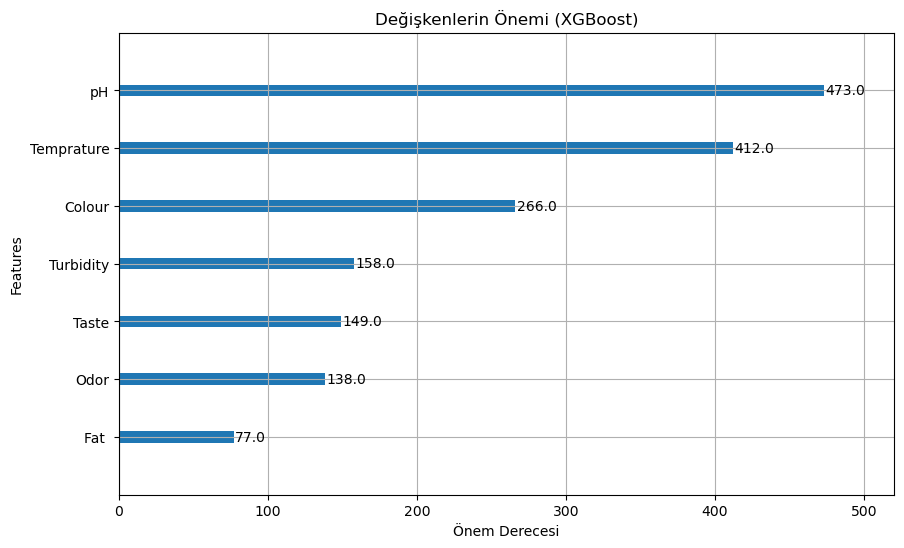

In [17]:
plot_importance(model)


In [18]:
def get_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred ,average='weighted')
    f1 = f1_score(y_test, y_pred , average='weighted')
    return {'accuracy': round(acc, 2), 'precision': prec, 'recall': recall, 'f1 score': f1}

In [19]:
get_metrics(y_test, rounded_y_pred)

{'accuracy': 0.98,
 'precision': 0.9814536878216124,
 'recall': 0.9811320754716981,
 'f1 score': 0.9811401505188794}

<h2>MlFlow Starts Here</h2>


In [20]:
experiment_name = "Milk Quality Xgboost" ##basic classifier
run_name= "xgboost_mlflow"
run_metrics = get_metrics(y_test, rounded_y_pred)
print(run_metrics)

{'accuracy': 0.98, 'precision': 0.9814536878216124, 'recall': 0.9811320754716981, 'f1 score': 0.9811401505188794}


In [21]:
def create_experiment(experiment_name, run_name, run_metrics, model, importance_plot_path=None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000")  # uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not importance_plot_path == None:
            mlflow.log_artifact(importance_plot_path, "plot_importance")
        
        mlflow.set_tag("tag1", "XGBoost")
        #mlflow.set_tags({"tag2": "XGBoost Parameters", "tag3": "Production"}) # uncomment if you need more tags

            
    print('Run - %s is logged to Experiment - %s using XGBoost' % (run_name, experiment_name))


In [23]:
create_experiment(experiment_name,run_name,run_metrics,model,"plot_importance.png",params)

2023/10/04 01:08:52 INFO mlflow.tracking.fluent: Experiment with name 'Milk Quality Xgboost' does not exist. Creating a new experiment.


Run - xgboost_mlflow is logged to Experiment - Milk Quality Xgboost using XGBoost


C:\Users\isilh\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<h4>Hyperparameter Tunning</h4>

In [26]:
def hyper_parameter_tuning(X_train, y_train):
    # Define parameter grid
    param_grid = {
        'n_estimators': [5, 21, 51, 101],
        'max_depth': [5, 8],
        'learning_rate': [0.5, 0.001],
        'subsample': [0.8],
        'colsample_bytree': [0.5, 1.0]
    }

    model = XGBRegressor()  # Define the model

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_
    print("Best Parameters:", best_params)
    print("Best Score:", best_score)

    # The best model is already available through grid_search.best_estimator_
    return best_model,best_params


In [27]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [28]:
warnings.simplefilter(action='ignore', category=Warning)
experiment_name = "optimized model"
run_name="XGBoost_Tuned_Model"

In [32]:
best_model, best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 101, 'subsample': 0.8}
Best Score: -0.0037660006543575263


In [33]:
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.5,
 'max_depth': 8,
 'n_estimators': 101,
 'subsample': 0.8}

In [34]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=101, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
y_pred = best_model.predict(X_test)


In [36]:
y_pred = predict_on_test_data(best_model,X_test) #will return the predicted class

In [37]:
rounded_y_pred = np.round(y_pred)
print(rounded_y_pred)


[3. 1. 1. 2. 2. 1. 1. 3. 1. 2. 1. 2. 3. 2. 1. 1. 3. 2. 2. 2. 1. 2. 3. 2.
 2. 2. 2. 3. 1. 1. 2. 3. 3. 2. 3. 2. 2. 3. 2. 2. 1. 1. 1. 2. 3. 1. 3. 3.
 2. 3. 2. 1. 1. 2. 2. 1. 3. 1. 1. 2. 2. 1. 3. 3. 3. 1. 2. 2. 1. 2. 1. 1.
 3. 2. 1. 1. 1. 2. 1. 2. 2. 2. 3. 3. 2. 2. 2. 1. 2. 3. 1. 1. 3. 2. 1. 2.
 3. 3. 1. 3. 1. 1. 1. 1. 2. 2. 1. 1. 2. 3. 3. 2. 2. 1. 3. 1. 2. 1. 1. 3.
 2. 1. 1. 1. 2. 2. 2. 2. 3. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 3. 1. 2.
 1. 1. 3. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 3. 1. 3. 2. 2. 2. 1. 2. 3. 1. 1.
 2. 1. 2. 3. 1. 1. 3. 1. 2. 2. 2. 2. 1. 2. 3. 1. 3. 1. 2. 3. 2. 1. 1. 2.
 2. 1. 3. 1. 1. 3. 2. 2. 2. 2. 3. 3. 2. 1. 2. 2. 2. 2. 3. 3.]


In [38]:
run_metrics = get_metrics(y_test, rounded_y_pred)

In [39]:
run_metrics

{'accuracy': 0.99,
 'precision': 0.9859574929516374,
 'recall': 0.9858490566037735,
 'f1 score': 0.9858651290676249}

In [40]:
for param in run_params:
    print(param, run_params[param])

colsample_bytree 1.0
learning_rate 0.5
max_depth 8
n_estimators 101
subsample 0.8


In [41]:
create_experiment(experiment_name,run_name,run_metrics,best_model,"plot_importance.png",run_params)

2023/10/04 01:10:17 INFO mlflow.tracking.fluent: Experiment with name 'optimized model' does not exist. Creating a new experiment.


Run - XGBoost_Tuned_Model is logged to Experiment - optimized model using XGBoost


<h2>Model Registry</h2>


In [42]:
import mlflow
logged_model = 'runs:/87fa7f375f0a4b16a0d99ec413bb8638/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
# Change data with X_test
loaded_model.predict(pd.DataFrame(X_test))

array([3.0053113 , 1.0000255 , 0.9999826 , 1.9999311 , 1.9998705 ,
       1.0000181 , 1.0000664 , 2.9999046 , 1.0000322 , 2.0004592 ,
       0.99997723, 2.0000312 , 2.9999366 , 2.0000312 , 1.0000181 ,
       1.0000664 , 3.0000515 , 1.9998958 , 1.9998705 , 1.9999883 ,
       1.0000322 , 1.9999673 , 2.9999366 , 1.9999969 , 1.9999969 ,
       2.0004592 , 2.2907176 , 2.999627  , 1.0000439 , 1.0000085 ,
       1.999896  , 2.9971251 , 3.0000072 , 2.0004592 , 2.9999046 ,
       1.999886  , 2.0005522 , 2.9999046 , 1.9999985 , 2.0000312 ,
       1.0000085 , 1.0000181 , 1.0000322 , 2.0004592 , 2.9999955 ,
       1.0000582 , 2.9999099 , 2.9999366 , 1.999917  , 2.9999366 ,
       2.000012  , 1.0000181 , 1.0000582 , 1.9999883 , 1.9998705 ,
       1.0000181 , 2.9999366 , 0.9999826 , 0.9999776 , 2.0001345 ,
       1.9999985 , 0.9997262 , 3.0003397 , 3.000187  , 2.9999046 ,
       1.0000322 , 1.9999673 , 1.9999311 , 1.0000703 , 1.9992998 ,
       1.0002077 , 0.99996215, 3.0000236 , 1.999896  , 1.00003

<h4>Method 1</h4>

In [47]:
def create_experiment_and_register(experiment_name, run_name, run_metrics, model,registered_model_name, importance_plot_path=None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000")  # uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not importance_plot_path == None:
            mlflow.log_artifact(importance_plot_path, "plot_importance")
        
        mlflow.set_tag("tag1", "XGBoost")
        #mlflow.set_tags({"tag2": "XGBoost Parameters", "tag3": "Production"}) # uncomment if you need more tags
        mlflow.sklearn.log_model(model, "model",registered_model_name= registered_model_name )
            
    print('Run - %s is logged to Experiment and Registered - %s using XGBoost' % (run_name, experiment_name))

In [49]:
experiment_name = "Register_XGBoost_model" #+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="xgboostregister" #+str(datetime.now().strftime("%d-%m-%y"))
registered_model_name= "Register_milkQ_XGBoost_model"
create_experiment_and_register(experiment_name,run_name,run_metrics,best_model,registered_model_name,"plot_importance.png")

Successfully registered model 'Register_milkQ_XGBoost_model'.
2023/10/04 01:29:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Register_milkQ_XGBoost_model, version 1


Run - xgboostregister is logged to Experiment and Registered - Register_XGBoost_model using XGBoost


Created version '1' of model 'Register_milkQ_XGBoost_model'.


<h4>Method 2</h4>

In [50]:
import mlflow
with mlflow.start_run(run_name=run_name) as run:
    result = mlflow.register_model(
        "runs:/87fa7f375f0a4b16a0d99ec413bb8638/model",
        "Register_milkQ_XGBoost_model-2"
    )

Successfully registered model 'Register_milkQ_XGBoost_model-2'.
2023/10/04 01:38:20 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Register_milkQ_XGBoost_model-2, version 1
Created version '1' of model 'Register_milkQ_XGBoost_model-2'.
